In [2]:
import numpy as np
from envs.grid_word_AB import GridWorld

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
direction = 'down'
fail_prob = 0.0

In [5]:
import time
import os

In [6]:
n_games = 50
sleep_time = 0

In [7]:
import pickle as pkl
numSlips = 7

In [8]:
data_down = []
data_up = []
data_center = []

data_down.append(np.load(open("data/gridworld_discrete/policy-down-games-50-slip0.npy","rb"), allow_pickle=True))
data_down.append(np.load(open("data/gridworld_discrete/policy-down-games-50-slip10.npy","rb"), allow_pickle=True))
data_down.append(np.load(open("data/gridworld_discrete/policy-down-games-50-slip20.npy","rb"), allow_pickle=True))
data_down.append(np.load(open("data/gridworld_discrete/policy-down-games-50-slip30.npy","rb"), allow_pickle=True))
data_down.append(np.load(open("data/gridworld_discrete/policy-down-games-50-slip40.npy","rb"), allow_pickle=True))
data_down.append(np.load(open("data/gridworld_discrete/policy-down-games-50-slip50.npy","rb"), allow_pickle=True))
data_down.append(np.load(open("data/gridworld_discrete/policy-down-games-50-slip60.npy","rb"), allow_pickle=True))
data_down.append(np.load(open("data/gridworld_discrete/policy-down-games-50-slip70.npy","rb"), allow_pickle=True))
data_down.append(np.load(open("data/gridworld_discrete/policy-down-games-50-slip80.npy","rb"), allow_pickle=True))
data_down.append(np.load(open("data/gridworld_discrete/policy-down-games-50-slip89.npy","rb"), allow_pickle=True))
for i in range(len(data_down)):
    data_down[i] = data_down[i].tolist()

data_up.append(np.load(open("data/gridworld_discrete/policy-up-games-50-slip0.npy","rb"), allow_pickle=True))
data_up.append(np.load(open("data/gridworld_discrete/policy-up-games-50-slip10.npy","rb"), allow_pickle=True))
data_up.append(np.load(open("data/gridworld_discrete/policy-up-games-50-slip20.npy","rb"), allow_pickle=True))
data_up.append(np.load(open("data/gridworld_discrete/policy-up-games-50-slip30.npy","rb"), allow_pickle=True))
data_up.append(np.load(open("data/gridworld_discrete/policy-up-games-50-slip40.npy","rb"), allow_pickle=True))
data_up.append(np.load(open("data/gridworld_discrete/policy-up-games-50-slip50.npy","rb"), allow_pickle=True))
data_up.append(np.load(open("data/gridworld_discrete/policy-up-games-50-slip60.npy","rb"), allow_pickle=True))
data_up.append(np.load(open("data/gridworld_discrete/policy-up-games-50-slip70.npy","rb"), allow_pickle=True))
data_up.append(np.load(open("data/gridworld_discrete/policy-up-games-50-slip80.npy","rb"), allow_pickle=True))
data_up.append(np.load(open("data/gridworld_discrete/policy-up-games-50-slip89.npy","rb"), allow_pickle=True))
for i in range(len(data_up)):
    data_up[i] = data_up[i].tolist()

data_center.append(np.load(open("data/gridworld_discrete/policy-center-games-50-slip0.npy","rb"), allow_pickle=True))
data_center.append(np.load(open("data/gridworld_discrete/policy-center-games-50-slip10.npy","rb"), allow_pickle=True))
data_center.append(np.load(open("data/gridworld_discrete/policy-center-games-50-slip20.npy","rb"), allow_pickle=True))
data_center.append(np.load(open("data/gridworld_discrete/policy-center-games-50-slip30.npy","rb"), allow_pickle=True))
data_center.append(np.load(open("data/gridworld_discrete/policy-center-games-50-slip40.npy","rb"), allow_pickle=True))
data_center.append(np.load(open("data/gridworld_discrete/policy-center-games-50-slip50.npy","rb"), allow_pickle=True))
data_center.append(np.load(open("data/gridworld_discrete/policy-center-games-50-slip60.npy","rb"), allow_pickle=True))
data_center.append(np.load(open("data/gridworld_discrete/policy-center-games-50-slip70.npy","rb"), allow_pickle=True))
data_center.append(np.load(open("data/gridworld_discrete/policy-center-games-50-slip80.npy","rb"), allow_pickle=True))
data_center.append(np.load(open("data/gridworld_discrete/policy-center-games-50-slip89.npy","rb"), allow_pickle=True))
for i in range(len(data_center)):
    data_center[i] = data_center[i].tolist()

In [10]:
summarized_down_data = []
summarized_up_data = []
summarized_center_data = []

for slipprob in data_down:
  down_game_data = []
  for game in slipprob:
    state_avg = np.zeros(2)
    for state in game:
      state_avg += state
    state_avg /= len(game)
    down_game_data.append(state_avg)
  summarized_down_data.append(down_game_data)
for slipprob in data_center:
  center_game_data = []
  for game in slipprob:
    state_avg = np.zeros(2)
    for state in game:
      state_avg += state
    state_avg /= len(game)
    center_game_data.append(state_avg)
  summarized_center_data.append(center_game_data)
for slipprob in data_up:
  up_game_data = []
  for game in slipprob:
    state_avg = np.zeros(2)
    for state in game:
      state_avg += state
    state_avg /= len(game)
    up_game_data.append(state_avg)
  summarized_up_data.append(up_game_data)

In [12]:
for i in range(len(summarized_down_data)):
    summarized_down_data[i] = np.array(summarized_down_data[i])
for i in range(len(summarized_up_data)):
    summarized_up_data[i] = np.array(summarized_up_data[i])
for i in range(len(summarized_center_data)):
    summarized_center_data[i] = np.array(summarized_center_data[i])
summarized_down_data = np.array(summarized_down_data)
summarized_up_data = np.array(summarized_up_data)
summarized_center_data = np.array(summarized_center_data)

In [14]:
from sklearn.cluster import KMeans

In [15]:
combined_data = []
for i in range(len(summarized_down_data)):
    combined_data.append(np.vstack([summarized_center_data[i], summarized_down_data[i], summarized_up_data[i]]))

In [16]:
kmeans = []
for i in range(len(combined_data)):
    kmeans.append(KMeans(n_clusters=3).fit(combined_data[i]))

In [18]:
for i in range(len(combined_data)):
    kmeans[i].cluster_centers_

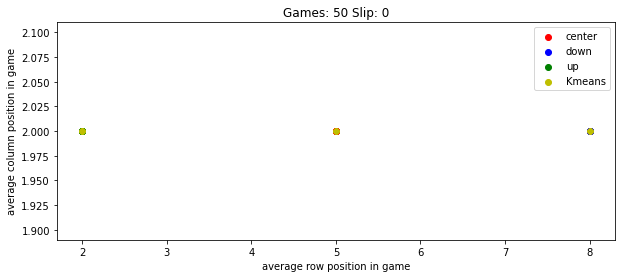

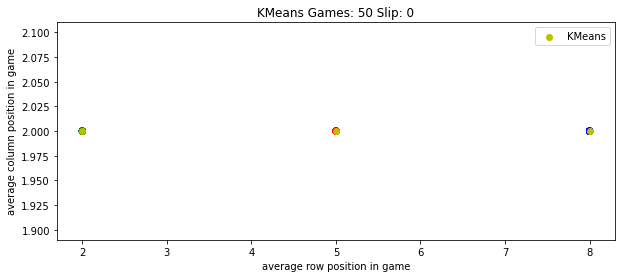

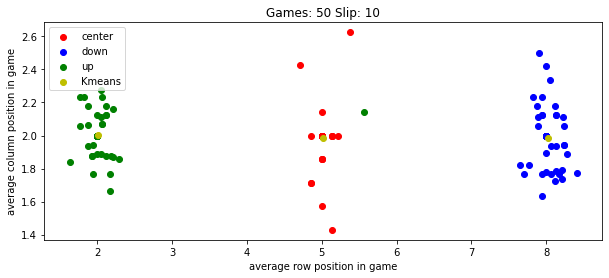

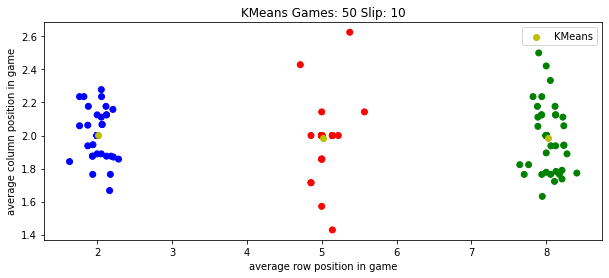

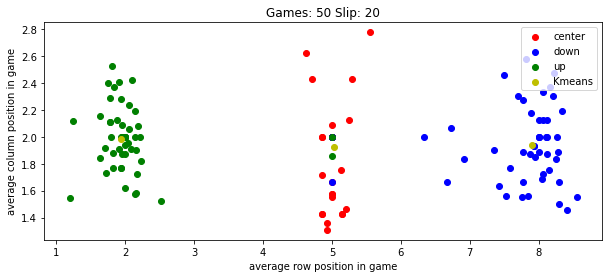

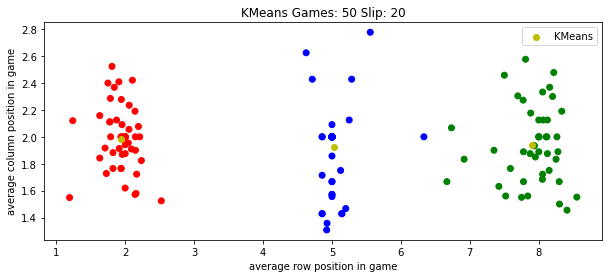

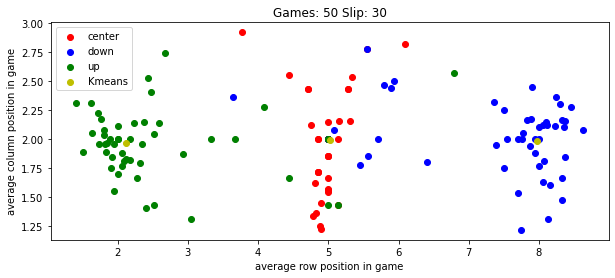

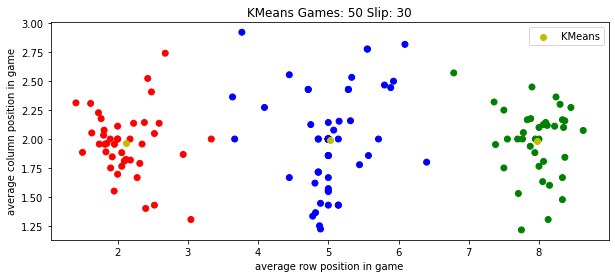

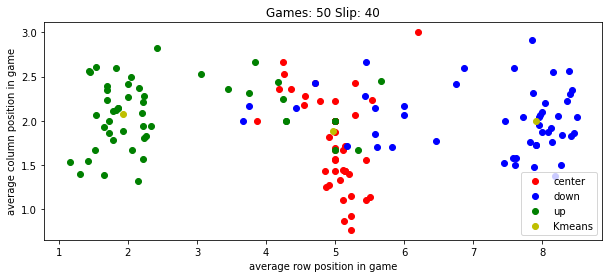

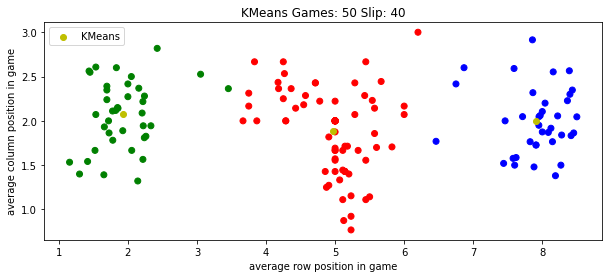

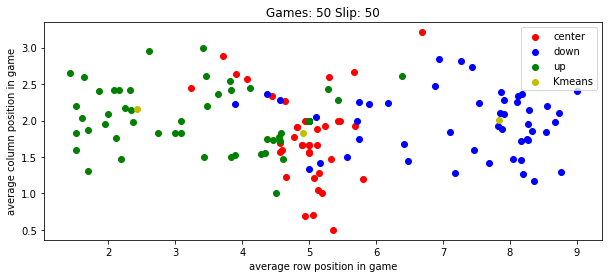

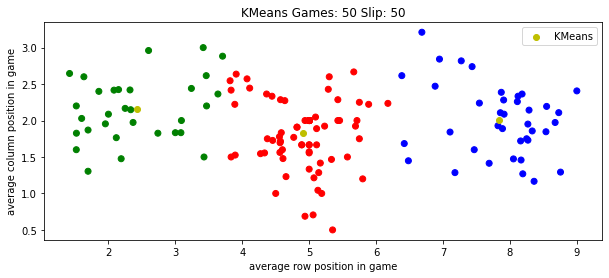

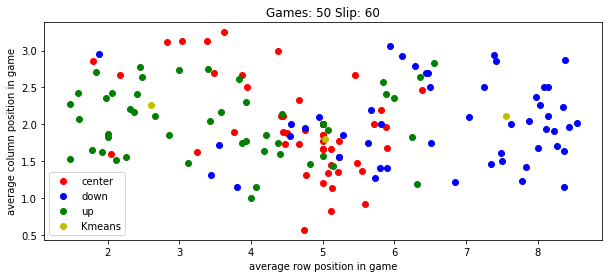

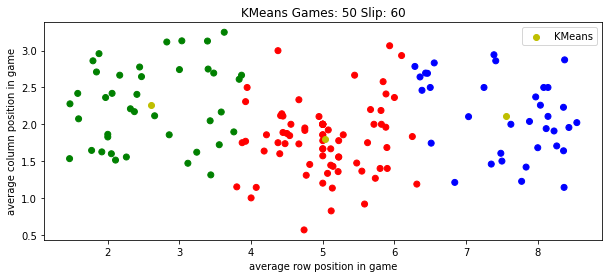

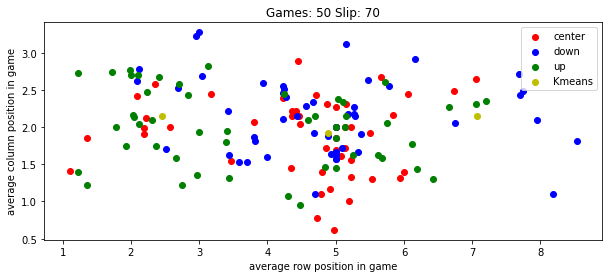

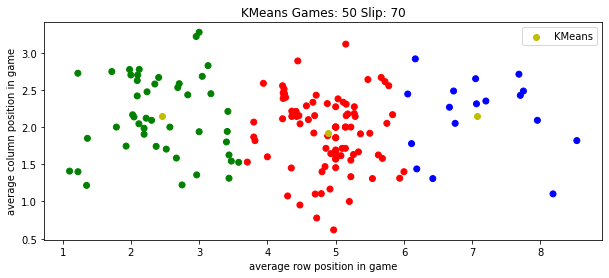

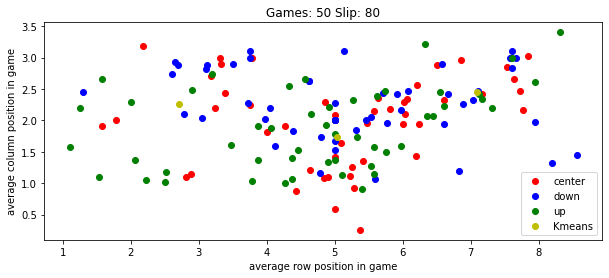

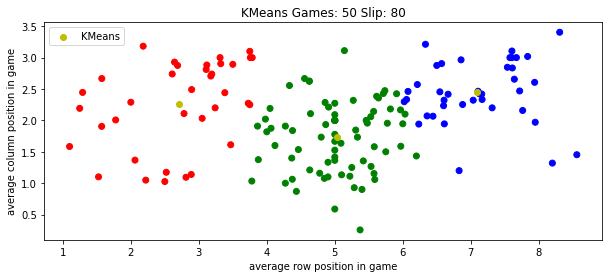

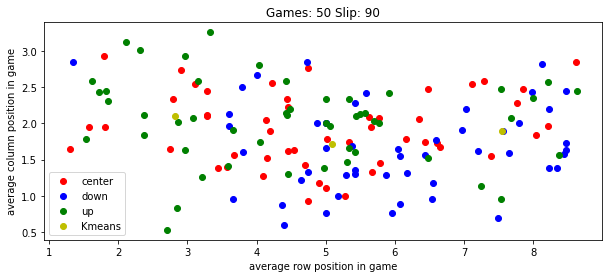

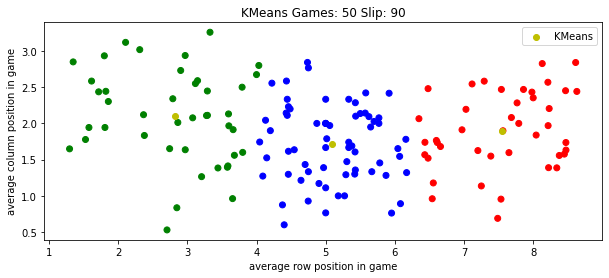

In [38]:
for i in range(len(summarized_center_data)):
    plt.figure(figsize = (10,4))
    plt.scatter(summarized_center_data[i][:,0], summarized_center_data[i][:,1], c='r', label = 'center')
    plt.scatter(summarized_down_data[i][:,0], summarized_down_data[i][:,1],  c='b', label = 'down')
    plt.scatter(summarized_up_data[i][:,0], summarized_up_data[i][:,1],  c='g', label = 'up')
    plt.scatter(kmeans[i].cluster_centers_[:, 0], kmeans[i].cluster_centers_[:, 1], c='y', label = 'Kmeans')
    plt.xlabel('average row position in game')
    plt.ylabel('average column position in game')
    plt.legend()
    plt.title('Games: 50 Slip: ' + str(i*10))
    plt.figure(figsize = (10,4))
    colors = []
    for label in kmeans[i].labels_:
        if label == 0:
            color = 'blue'
        elif label == 1:
            color = 'green'
        else:
            color = 'red'
        colors.append(color)
    plt.scatter(combined_data[i][:,0], combined_data[i][:,1], c = colors)
    plt.scatter(kmeans[i].cluster_centers_[:, 0], kmeans[i].cluster_centers_[:, 1], c='y', label = 'KMeans')
    plt.xlabel('average row position in game')
    plt.ylabel('average column position in game')
    plt.legend()
    plt.title('KMeans Games: 50 Slip: ' + str(i*10))